# This notebook will import price, volume nad index constituents time series from Norgate. We will be ending up with a wide dataframe with dates as the index and columns as symbols. 

Importing libraries

In [10]:
import warnings
warnings.filterwarnings('ignore')

norgatedata is a library containing functions to pull data from the NDU software. The NDU software manages norgate data in the local directory. 

In [11]:
import numpy as np
import pandas as pd
import norgatedata 
import datetime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import pickle

import the norgate library containing wrapper functions for pulling historical time series of a ticker.

In [12]:
import norgate as ng

Define watchlist with current and past assets and define a watchlist of symbols for Russell 3000

In [13]:
watchlistname = 'Russell 3000 Current & Past'
symbols = norgatedata.watchlist_symbols(watchlistname)

Symbols that are delisted are in format of 'symbol-yymm', indicating the symbol name and the delisted date. Since some symbols are recycled, it is worth noting that for example,'AAI-199808' and 'AAI-201105' can be different companies. 

In [14]:
symbols

['A',
 'AA',
 'AABA-201910',
 'AAC-199601',
 'AAC-200004',
 'AACC-201306',
 'AACE-200610',
 'AACH',
 'AACI-199711',
 'AADV-199804',
 'AAH-199805',
 'AAI-199908',
 'AAI-201105',
 'AAIIQ',
 'AAIIQ-200603',
 'AAL',
 'AAL-199702',
 'AALR-199707',
 'AAMC',
 'AAMRQ-201312',
 'AAN',
 'AAN-201012',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AATI-199906',
 'AATI-201201',
 'AATT-200002',
 'AAV-199901',
 'AAWHQ-200407',
 'AAWW',
 'AAXN',
 'AB-199708',
 'ABAT-201512',
 'ABAX-201807',
 'ABBC-201109',
 'ABBV',
 'ABBY-199506',
 'ABC',
 'ABCB',
 'ABCC-199810',
 'ABCD-201812',
 'ABCL-200107',
 'ABCO-199905',
 'ABCO-201711',
 'ABCP',
 'ABCR-200110',
 'ABCW-201604',
 'ABCWQ-201309',
 'ABDN-199212',
 'ABDR-199911',
 'ABDS-201012',
 'ABE-199506',
 'ABEO',
 'ABF-200308',
 'ABG',
 'ABG-199311',
 'ABGX-200603',
 'ABI-199908',
 'ABI-200811',
 'ABII-201010',
 'ABIO',
 'ABIO-199302',
 'ABIZA-200204',
 'ABKFQ-201304',
 'ABKR-199501',
 'ABLSQ-200608',
 'ABLT',
 'ABM',
 'ABMD',
 'ABN-199908',
 'ABNK-200512',
 'AB

## Create our index constituent series of all watchlist names

Create a basis dataframe for joining each asset's constituent index with a loop. Use AAPL since its an asset that lived during all periods in SP500.

In [15]:
indexname = 'Russell 3000'
df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")

df['Index Constituent'] = 0

Joining asset's index constituent time series. There's a problem though, because there are assets that are the same but delisted. They come and go. So in the next part we would attempt to join the same assets into a single wide index constituent series).

In [16]:
for sym in symbols:
    idx = norgatedata.index_constituent_timeseries(
    sym,
    indexname,
    format = "pandas-dataframe",
)
    print(sym)
    idx.rename({'Index Constituent':sym},axis=1,inplace=True)
    #looping and left joining symbol data
    df = df.merge(idx,how='left',left_index=True,right_index=True)
    

A
AA
AABA-201910
AAC-199601
AAC-200004
AACC-201306
AACE-200610
AACH
AACI-199711
AADV-199804
AAH-199805
AAI-199908
AAI-201105
AAIIQ
AAIIQ-200603
AAL
AAL-199702
AALR-199707
AAMC
AAMRQ-201312
AAN
AAN-201012
AAOI
AAON
AAP
AAPL
AAT
AATI-199906
AATI-201201
AATT-200002
AAV-199901
AAWHQ-200407
AAWW
AAXN
AB-199708
ABAT-201512
ABAX-201807
ABBC-201109
ABBV
ABBY-199506
ABC
ABCB
ABCC-199810
ABCD-201812
ABCL-200107
ABCO-199905
ABCO-201711
ABCP
ABCR-200110
ABCW-201604
ABCWQ-201309
ABDN-199212
ABDR-199911
ABDS-201012
ABE-199506
ABEO
ABF-200308
ABG
ABG-199311
ABGX-200603
ABI-199908
ABI-200811
ABII-201010
ABIO
ABIO-199302
ABIZA-200204
ABKFQ-201304
ABKR-199501
ABLSQ-200608
ABLT
ABM
ABMD
ABN-199908
ABNK-200512
ABOV-199909
ABP-200002
ABR
ABRX-199907
ABS-200606
ABSC-200107
ABT
ABTC-199902
ABTI-199901
ABTX
ABTX-200001
ABUS
ABVT-201206
ABWTQ-201012
AC
ACA
ACA-199010
ACA-199703
ACAD
ACAP-201010
ACAS-201701
ACAT-201703
ACBI
ACC
ACCC-199804
ACCD
ACCL-201404
ACCMA-199412
ACCO
ACCS-199812
ACDO-200508
ACEE-200011
A

ATHR-201105
ATHX
ATHYQ-201602
ATI
ATI-199205
ATI-199906
ATISZ-200903
ATKN-199804
ATKR
ATL-200307
ATLC
ATLI-199810
ATLO
ATLPA-199809
ATLS-201102
ATM-199411
ATMI-201404
ATML-201604
ATN-200512
ATNI
ATNM
ATNX
ATNY-201604
ATO
ATOM
ATON-200010
ATPAQ-201412
ATPC-200012
ATPH-199301
ATPL
ATR
ATRA
ATRC
ATRC-199809
ATRI
ATRO
ATRS
ATRS-200704
ATRX
ATRX-200411
ATSG
ATSI-201008
ATSN-200604
ATSW-199608
ATTC-199710
ATTL-200301
ATUS
ATVC-199612
ATVI
ATW-199107
ATW-201710
ATX-201401
ATXI
AU-199806
AUB
AUBN
AUFN-199509
AUG-199612
AUGT-200602
AUMN
AUR-199712
AURA-199906
AURDQ-201002
AURFQ-200403
AURM-199708
AUTH-201210
AUTO
AUTO-201304
AUTR-199310
AUXL-201501
AV-200710
AVA
AVAK-199111
AVAV
AVB
AVC-200103
AVCO
AVCR-199411
AVCT-200912
AVD
AVDL-199907
AVDO-200505
AVDR-201911
AVE-199706
AVEI-199901
AVEO
AVGN-200912
AVGO
AVGR
AVGTF-201709
AVHI-201810
AVI-200102
AVID
AVIR-200201
AVIV-201504
AVL-199301
AVL-200609
AVLR
AVN-199806
AVNR-201501
AVNS
AVNT
AVNT-200206
AVNU-201606
AVNW
AVNX-200904
AVP-202001
AVRNQ-2010

CBS-200005
CBSA-200405
CBSH
CBSS-200709
CBST-201501
CBT
CBTC-199806
CBTF-199306
CBTX
CBU
CBWV-199309
CBXC-200006
CBZ
CBZ-200002
CBZ-200309
CC
CCA-199812
CCAR-199906
CCB
CCB-199602
CCB-200007
CCBG
CCBI-200609
CCBL-200712
CCBN-200601
CCBT-200404
CCC-201803
CCCG-200602
CCDC-200608
CCEM-199202
CCEP
CCF
CCG-201603
CCGM
CCHIA-199601
CCI
CCI-199810
CCIL-199903
CCIX-201402
CCK
CCL
CCM-199212
CCMC-199908
CCMP
CCN-200107
CCN-201707
CCNC-199210
CCNE
CCO
CCOI
CCON-199901
CCOWQ-200912
CCP-199508
CCP-201708
CCPI-199403
CCRD-200506
CCRN
CCRO-200104
CCS
CCS-200009
CCSC-199808
CCT-199810
CCTI-199705
CCTYQ-201109
CCU-200807
CCUR
CCXI
CCXLA-199505
CDAT-199709
CDAY
CDCAQ-201212
CDCC-199404
CDCO-200202
CDCRA-199805
CDD-200005
CDDD-200204
CDE
CDEV
CDG-199811
CDI-201709
CDIC-200908
CDIIQ
CDK
CDL-200001
CDLX
CDMO
CDMS-200703
CDNA
CDNS
CDNW-200008
CDO-200204
CDP-200008
CDR
CDRBQ
CDS-199707
CDSI-199712
CDT-199611
CDTX
CDV.A-199506
CDVIQ
CDW
CDWC-200710
CDX-200509
CDXC
CDXS
CDZI
CE
CE-200402
CEB-201704
CEBC-2002

CTX-200908
CTXS
CTYA-199910
CTYS-199805
CTZ-199008
CTZ-200003
CTZN-199806
CTZN-201404
CUB
CUBE
CUBE-200106
CUBI
CUBN-199707
CUDA-201802
CUE
CUE-199309
CUI-199907
CUL-199806
CULP
CUNB-201710
CUNO-200508
CUO-202005
CUREQ-200606
CURO
CUTR
CUTS-199610
CUZ
CV-201206
CVA
CVAS-200307
CVBF
CVC-201606
CVCO
CVCY
CVD-201502
CVEO
CVEO-200106
CVET
CVG-201810
CVGI
CVGW
CVH-201305
CVHL
CVI
CVI-200006
CVIAQ
CVLG
CVLT
CVLY
CVM
CVN-199112
CVN-199801
CVNA
CVNS-200707
CVON-201901
CVOVQ-201809
CVRS-201910
CVS
CVT-201611
CVTX-200904
CVU
CVX
CW
CWBR
CWCO
CWEI-201704
CWEN
CWEN.A
CWH
CWK
CWL-199910
CWLD-199107
CWN-200311
CWON-200411
CWST
CWT
CWTRQ-201409
CX-199711
CXDO
CXG-201005
CXO
CXP
CXPO-201310
CXR-200905
CXS-201305
CXW
CY-202004
CYBE
CYBI-201302
CYBR-199809
CYBR-200210
CYBS-201007
CYC-199204
CYCH-200103
CYCL-200911
CYCN
CYCO-200202
CYDS-201112
CYE-199612
CYGN-200511
CYH
CYH-199607
CYLK-200302
CYM-199912
CYMI-201305
CYN-201510
CYNI-201507
CYNO-201703
CYPB-201101
CYR-199606
CYRV-201007
CYRX
CYRX-199711
CYS

ESSX-201708
ESTC
ESTE
ESXB
ESY-199505
ET-201307
ETAD-200908
ETCO-199601
ETEC-200003
ETEK-200006
ETFC
ETH
ETM
ETN
ETNB
ETON
ETR
ETRN
ETS-200603
ETSY
ETV-200011
ETW-200011
ETYS-200102
EUA-200004
EUBK-201404
EURX-201103
EV
EVBG
EVBN
EVBS-201706
EVC
EVDY-201612
EVEIQ-201604
EVER
EVER-201706
EVFM
EVG-200409
EVGN-199812
EVH
EVHC-201612
EVHC-201810
EVI
EVLO
EVOP
EVOQ-201410
EVR
EVR-199909
EVRG
EVRI
EVRT-200410
EVRX-199301
EVRYQ-201506
EVTC
EVTCY
EVVV-201007
EW
EWB-200105
EWBC
EWR-199712
EXA-201711
EXAC-201802
EXAM-201607
EXAP-200206
EXAR-201705
EXAS
EXC
EXC-199903
EXCO-200307
EXDS-200109
EXDT-200405
EXEE-200312
EXEL
EXL-201507
EXLN-200212
EXLS
EXLT-200409
EXMCQ-201402
EXP
EXPD
EXPE
EXPEA-200308
EXPI
EXPO
EXPR
EXR
EXTN
EXTN-200303
EXTR
EXXIQ-201612
EYE
EYE-199203
EYE-199605
EYE-200505
EYE-200902
EYES
EYET-200511
EYPT
EZCIA-199704
EZEM-200804
EZEN
EZPW
F
FAB-200405
FACO
FACT-201004
FADV-200911
FAF
FAHS-199406
FALC
FAM.B-199709
FAM-199910
FAMA-199311
FAMRB-199209
FANG
FAOOQ-200411
FARC-200005
FA

GO
GOAL-199207
GOAL-200006
GOCO
GOG-199605
GOGL
GOGO
GOLF
GON-200008
GOOD
GOOD-199311
GOOG
GOOGL
GORO
GOSHA-200507
GOSS
GOTK-199806
GOTTQ-201103
GP-200512
GPC
GPFI-200003
GPH-199701
GPI
GPI-199604
GPK
GPMT
GPN
GPOR
GPRE
GPRO
GPRO-201207
GPS
GPSI-200104
GPT-200409
GPT-200704
GPT-201512
GPT-201810
GPU-200111
GPX
GQ-199404
GR-201207
GRA
GRA-199609
GRA-199803
GRAN-201110
GRAY-199205
GRB-201108
GRBEQ-201304
GRBK
GRC
GRCO-200107
GRDG-200001
GRE-199307
GREY-200503
GRG-199402
GRH-200003
GRHHQ-201710
GRIC-200602
GRIF
GRIT-199205
GRL-199008
GRM-201109
GRMN
GRN-199812
GRNB-201209
GRNT-199701
GRO-199506
GROS-199707
GROW
GRP-199811
GRP-200804
GRPN
GRST-199804
GRT-201501
GRTR-199709
GRTS
GRTX
GRUB
GRWG
GRXR-199712
GRY-199710
GRYP-199902
GS
GSAT
GSB-200211
GSB-202008
GSBC
GSBI-200302
GSBK-199412
GSC-199702
GSCC-199109
GSE-200405
GSEHQ-201408
GSF-200711
GSHD
GSIC-201106
GSIH
GSIT
GSKY
GSL
GSL-200701
GSM
GSM-201512
GSMS-199803
GSNX-200101
GSOF-199809
GSOF-200407
GSOL-201708
GSPN-200402
GSS
GSSC-199412


INT
INTC
INTD-200508
INTEQ
INTF-200009
INTL-200708
INTP-199610
INTR-199109
INTS-200002
INTU
INTV-200809
INTW-200105
INTX-201901
INTZ
INVA
INVE
INVH
INVHY-201007
INVI
INVI-199705
INVN-200412
INVN-201705
INVX-201309
INWK-202009
INZY
IO
IOI-200102
IOM-200806
ION-200502
IONS
IOR-199011
IOSP
IOTS-202006
IOVA
IP
IPAC-199811
IPAR
IPAS-201902
IPCC-201807
IPCM-201511
IPCR-200909
IPCS-200912
IPEC-199904
IPG
IPGP
IPHI
IPHS-202002
IPI
IPI-200006
IPIXQ-200609
IPL-200103
IPMT-200605
IPSU-201206
IPW-199804
IPX-200707
IQ-199608
IQNT-201702
IQST-199912
IQV
IR
IRBT
IRC-201603
IRDM
IRDV-199505
IRET
IRF-201501
IRGI-200410
IRGTQ-201712
IRIC-200312
IRIS-201210
IRIX
IRM
IRMC-200907
IRMD
IRT
IRT-200302
IRTC
IRW-200806
IRWD
IRWNQ-201311
ISBC
ISCA-201910
ISCIQ-201509
ISE-200712
ISEE
ISG-200504
ISHCQ-201707
ISI-199010
ISIL-201702
ISKO-200406
ISLD-200108
ISLE-201705
ISLI-199809
ISLN-201012
ISN-199909
ISO-199709
ISP-200302
ISPC-199405
ISPH-201105
ISRG
ISRL-201910
ISSC
ISSI-201512
ISSS-199511
ISSX-200610
ISTA-20120

MAXI-200806
MAXM-200601
MAXN
MAXR
MAXS-200407
MAXX-201602
MAXY-201308
MAY-199602
MAY-200508
MAYF-199503
MAYS
MB-200001
MB-201902
MBC-199509
MBCN
MBE-200006
MBFI-201903
MBG-200504
MBHI-201008
MBI
MBII
MBIN
MBIO
MBLMA-199706
MBLYA-199605
MBN-199601
MBNY-200101
MBOT
MBRG-201703
MBRKQ-201101
MBRN-200108
MBRX-201001
MBSI-200010
MBTF-201908
MBUU
MBVT-201705
MBVXQ-202003
MBWM
MC
MCA-199101
MCAFA-200209
MCAWA-199409
MCB
MCBC
MCBI-201401
MCBS
MCC
MCCC-201103
MCCI-199712
MCCK
MCCS-199311
MCD
MCDTA-200701
MCDY-199902
MCEG-199010
MCELQ
MCF
MCFE-199707
MCFT
MCG-199507
MCGC-201508
MCH-199509
MCH-200411
MCHN-199205
MCHP
MCHX
MCIC-199809
MCIP-200601
MCK
MCK-199411
MCKC-200309
MCLD-200601
MCLDQ-200201
MCLL-200104
MCN-200105
MCNS-200103
MCO
MCO-199408
MCOAQ-201403
MCOM-200107
MCON-199906
MCOR-199112
MCPIQ-201608
MCRB
MCRI
MCRL-201508
MCRN-199807
MCRN-201911
MCRS-201409
MCS
MCSI-200304
MCSY-199711
MCTH-199807
MCTR-200309
MCU-199601
MCWEQ-200404
MCY
MD
MD-199707
MDA-199803
MDA-200401
MDAL-199511
MDAS-2016

NLI-199201
NLN-199401
NLOK
NLON-199208
NLS
NLSN
NLTX
NLY
NM
NMBL-201704
NMBS-199807
NMFC
NMG.A-200510
NMGC
NMIH
NMK-200201
NMPC-199910
NMR-199910
NMRD
NMRK
NMRX-201712
NMTC-200302
NMTR
NMX-200808
NNA
NNBR
NNI
NNN
NNS-200201
NNVC
NOBLQ-200912
NOC
NODK
NOEL-199908
NOG
NOLD-200505
NOPT-200206
NORNQ
NOV
NOVA
NOVA-201105
NOVC
NOVL-201104
NOVN
NOVN-200908
NOVT
NOVX-199209
NOW
NOW-200305
NOWT-199007
NOXO-199706
NP
NPBC-201604
NPCI-200108
NPIX-200108
NPK
NPLA-201002
NPLS-200202
NPNT-200101
NPO
NPR-199809
NPSI-200712
NPSP-201502
NPTH-199909
NPTN
NR
NRBO
NRC
NRC-199906
NRCG-201910
NRCIB-201804
NRDSQ-201609
NRE-199610
NRE-201909
NREB-200702
NRES-199911
NRF-201701
NRG
NRG-200206
NRGN-200912
NRI-200111
NRIM
NRIX
NRL-199907
NRND-199703
NRPH-200704
NRRD-200501
NRVHQ-201008
NRZ
NSA
NSB-199506
NSBA-199302
NSBI-199605
NSBK-199612
NSC
NSCB-199502
NSCC-199906
NSCI-199807
NSCN-200404
NSCO
NSCO-199503
NSCP-199903
NSD-200009
NSDA-200505
NSFC-201810
NSHA-200909
NSI-200306
NSIL-200202
NSIT
NSIX-199903
NSM-2011

PMD
PMFG-201509
PMI-199911
PMI-201110
PMIL-200110
PMK-200009
PMRX-199903
PMRY-200911
PMSI-200411
PMSV-199506
PMT
PMTI-201306
PMTR-200701
PMTS
PMTS-199809
PN-199109
PN-200103
PNB-200102
PNC
PNCLQ-201305
PNDA-199812
PNDR-199902
PNET-199712
PNFP
PNFTQ-200504
PNG-200501
PNK-201604
PNK-201810
PNL-199611
PNM
PNN.A-200505
PNN-200505
PNNT
PNNW-201201
PNP-200610
PNR
PNRA-201707
PNRG
PNS-199110
PNSNQ-201308
PNT-199911
PNTG
PNTK-200007
PNTPQ-201807
PNU-200003
PNW
PNWB-200310
PNX-201606
PNY-201610
PODD
POG-200505
POM-201603
PONE-201006
PONR-200708
POOL
POPX-199011
POR
PORK-200705
PORT-200307
POS-200710
POSOQ-200806
POSS-200804
POST
POVT-200211
POWI
POWL
POWR-201605
POYO-199807
POZN-201602
PP-200601
PPBI
PPC
PPCO-201011
PPD
PPD-201106
PPDI-201112
PPG
PPH-199811
PPL
PPO-201508
PPP-200711
PPRO-200911
PPS-201611
PPSI-199602
PPW-199911
PQG
PQUEQ-201902
PRA
PRAA
PRAH
PRAI-200712
PRBC-199601
PRBZ-200306
PRCM-200612
PRCP
PRCS-200702
PRCY-200503
PRD-200110
PRDO
PRDS-200306
PRE-199604
PRE-201603
PREF-199509

SBKCQ-201603
SBL-200701
SBLK
SBLK-200506
SBLUQ-201108
SBMC-200404
SBN-199011
SBN-199803
SBNY
SBO-199806
SBOS-199606
SBOW
SBP-199505
SBP-201007
SBPH
SBRA
SBRU-199008
SBSAA
SBSE-200606
SBSI
SBT
SBTK-199911
SBUFQ-200912
SBUX
SBX-201302
SBY-201705
SBYN-200508
SBYT-199809
SC
SCA-199601
SCA-199807
SCAI-200404
SCAI-201703
SCAN-199911
SCBC-199505
SCBI-200403
SCCO
SCFB-199301
SCFS-200407
SCG-201812
SCHL
SCHN
SCHR-200301
SCHSQ-201306
SCHW
SCI
SCI-200112
SCIL-202009
SCIO-200304
SCL
SCLN-201710
SCM
SCMF-201210
SCMP-201802
SCMR-201611
SCNB-201703
SCNC-199112
SCNT-200111
SCO-199605
SCON
SCOP-199805
SCOR
SCOR-200212
SCOT-199903
SCOXQ-201105
SCPH
SCPJ
SCRI-200401
SCRP-199409
SCRX-200810
SCS
SCSC
SCT-199908
SCTC-200402
SCTT-200105
SCTTB-199812
SCTY-201611
SCU
SCUR-200811
SCVL
SCWX
SCX
SCY-199403
SCZ.B-200205
SCZ-199505
SD
SDG-199901
SDGR
SDH-200106
SDII-199812
SDLI-200102
SDOCQ-201610
SDRC-200108
SDRLF
SDS-200508
SDSK-199703
SDTHQ-201210
SDW-200011
SDXC-201004
SE-199210
SE-200003
SE-200511
SE-201702
SE

SYSF-199903
SYSM-199607
SYT-199604
SYUT-201705
SYX
SYY
SZ-200509
SZMK-201609
T
T-200511
TA-199907
TA-200110
TAA-200303
TAC-200105
TACO
TACO-200012
TACT
TAGS-200908
TAHO-201902
TAL-199802
TALK-200612
TALO
TALX-200705
TAM-201412
TANK-199901
TANN-200306
TAOP
TAP
TAP.A-200404
TAP.B-200404
TAP-200004
TARA
TARRQ-201007
TAST
TAT
TATE-199110
TAVA-199907
TAVI-199902
TAYC-201408
TBA-200004
TBACQ
TBBK
TBCC-200511
TBFC-200001
TBI
TBI-200405
TBIO
TBIT-199610
TBK
TBL-201109
TBNK
TBO-199112
TBP-200210
TBPH
TBRA-201610
TBS.A-199610
TBS.B-199610
TBSIQ-201204
TBV-201108
TBY-200005
TCA-200102
TCAT-199908
TCBI
TCBK
TCC-199610
TCC-200612
TCCO
TCDA
TCF
TCF-201907
TCFC
TCGIA-199807
TCGX-199710
TCI
TCII-200103
TCIVA-199903
TCK-200008
TCM-199710
TCMD
TCNJ-200405
TCNL-199712
TCNX-199501
TCO
TCOMA-199903
TCPC
TCPIF-201803
TCPTF-201610
TCR-200504
TCRD-199012
TCRR
TCS
TCSI-200301
TCT-200603
TCX
TDAT-199202
TDC
TDFX-200105
TDG
TDM-199708
TDOC
TDS
TDW
TDX-200004
TDY
TE-201606
TEA-201212
TEAM
TEAM-201012
TEAR-202007


VDC-199304
VEC
VECO
VEEV
VEL
VEN-199801
VENX-200112
VER
VERA-201307
VERI
VERO
VERTD-200801
VERU
VERY
VFC
VFI-199706
VFSC-199905
VG
VG-200204
VGR
VGR-199603
VGZ
VH-199708
VHC
VHI
VHRT-199309
VHS-201309
VIA-201912
VIAB-201912
VIAC
VIAC-200711
VIACA
VIAD-200110
VIAN-200209
VIAP
VIAS-200008
VIAS-201505
VIAV
VIBC-200212
VICI
VICR
VICT-199604
VIDA-200204
VIDE
VIDI-199907
VIE
VIEW-199712
VIEWF
VIFS-199308
VIGN-200907
VIONQ-201004
VIR
VIRC
VIRL-201009
VIRS-200301
VIRT
VITA-199107
VITA-201106
VITC-199304
VITC-201408
VITL
VITL-200810
VITR-200703
VIV-199210
VIVE
VIVO
VKNG-199808
VKSI-199310
VKTX
VL-200101
VLCM-201106
VLG-200702
VLGEA
VLID-199112
VLNCQ-201403
VLNK-200111
VLNT-199801
VLO
VLO-199707
VLP-199802
VLSI-199906
VLTC-201909
VLTR-201310
VLY
VM-200911
VMC
VMD
VMED-201306
VMEMQ-201704
VMG-199612
VMI
VMI-199312
VMIX-200111
VMSI-200802
VMW
VMXI-199403
VNBCQ-201008
VNCE
VNCP-199303
VNDA
VNO
VNRX
VNTV-199912
VNTX-199705
VNUS-200906
VNWI-201210
VNWK-200601
VNX-200308
VOCS-201405
VOLC-201502
VOLT
V

In [17]:
#Fill na, since all other days the ticker is not part of the index. 
index_const = df.fillna(0)

We can observe here that the amount of stocks in the index is not always 3000.

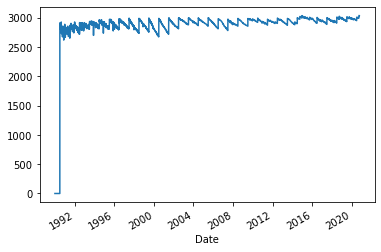

In [18]:
index_const.sum(axis=1).plot()

sort columns by alphabetical order and delete Index Constitutent

In [19]:
index_const1 = index_const.sort_index(axis=1).drop(['Index Constituent'],axis=1)

## Create the Russell 3000 current and past price series

Note that our price series is adjusted on a total return basis, taking account of dividends, earnings, and splits. 

In [20]:
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")

base_df['Index Constituent'] = 0

Loop for querying price

In [21]:
for sym in symbols:
    #looping and left joining symbols
    sym_price = ng.hist_sym(sym,'1990-01-01').rename({'Close':sym},axis=1)
    base_df = base_df.merge(sym_price[sym],how='left',left_index=True,right_index=True)
    

In [22]:
base_df.drop(['Index Constituent'],axis=1,inplace=True)

In [23]:
price_df = base_df.copy()

In [24]:
price_df1 = price_df.sort_index(axis=1)

## Create the Russell 3000 current and past volume series

In [25]:
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")

base_df['Index Constituent'] = 0

for sym in symbols:
    #looping and left joining symbols
    sym_price = ng.hist_sym(sym,'1990-01-01').rename({'Volume':sym},axis=1)
    base_df = base_df.merge(sym_price[sym],how='left',left_index=True,right_index=True)

base_df.drop(['Index Constituent'],axis=1,inplace=True)

volume_df = base_df.copy()

In [26]:
volume_df

,A,AA,AABA-201910,AAC-199601,AAC-200004,AACC-201306,AACE-200610,AACH,AACI-199711,AADV-199804,...,ZSPH-201512,ZTEC-199712,ZTS,ZU-201509,ZUMZ,ZUO,ZVO,ZYNE,ZYXI,ZZ-201303
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,87200.0,NaN,NaN,NaN,NaN,525.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,338000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,154300.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,NaN,NaN,NaN,52700.0,NaN,NaN,NaN,NaN,3937.499756,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,NaN,NaN,NaN,68300.0,NaN,NaN,NaN,NaN,8.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,1.338978e+06,5121059.0,NaN,NaN,NaN,NaN,NaN,130365.0,NaN,NaN,...,NaN,NaN,2293871.0,NaN,292729.0,1783423.0,222286.0,390574.0,391262.0,NaN
2020-09-29,7.236805e+05,5180879.0,NaN,NaN,NaN,NaN,NaN,119701.0,NaN,NaN,...,NaN,NaN,1046340.0,NaN,322666.0,1235376.0,148209.0,276455.0,347361.0,NaN
2020-09-30,1.364642e+06,5513080.0,NaN,NaN,NaN,NaN,NaN,67941.0,NaN,NaN,...,NaN,NaN,1906706.0,NaN,338287.0,1312842.0,353831.0,348164.0,1014031.0,NaN


We're gonna take only shares that are there after 2002, by summing the constituent columns. If 0, we discard the column. 

In [33]:
check_sum = index_const1.loc['2002-01-01':'2020-09-29'].sum()

In [34]:
check_sum

A              4719.0
AA              822.0
AABA-201910    3897.0
AAC-199601        0.0
AAC-200004        0.0
                ...  
ZUO             316.0
ZVO            2261.0
ZYNE            688.0
ZYXI            316.0
ZZ-201303      1687.0
Length: 11225, dtype: float64

In [35]:
index_const2 = index_const1[check_sum[check_sum > 0].index].loc['2002-01-01':'2020-09-29']

In [36]:
price_df2 = price_df1[check_sum[check_sum > 0].index].loc['2002-01-01':'2020-09-29']

In [37]:
volume_df2 = volume_df[check_sum[check_sum > 0].index].loc['2002-01-01':'2020-09-29']

Checking shapes whether the amount of symbols are equal and the length of time series are equal

In [49]:
index_const2.shape

(4719, 7265)

In [48]:
price_df2.shape

(4719, 7265)

In [42]:
volume_df2.shape

(4719, 7265)

In [47]:
index_const2.to_csv('russell3000_constituents_2002_1.csv')
price_df2.to_csv('russell3000_price_2002_1.csv')
volume_df2.to_csv('russell3000_volume_2002_1.csv')

Examining the number of constituents on a time series. We can see that the number of constituents is constantly changing.

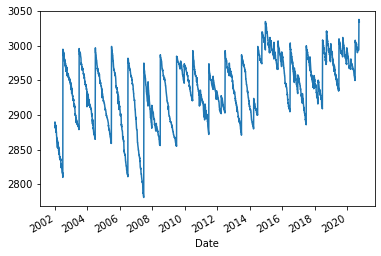

In [51]:
index_const2.sum(axis=1).plot()


## ============================================================================